<a href="https://colab.research.google.com/github/div-j/DataScience-Projects/blob/main/Kolade_Accident_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install mlxtend

# "Import library"

In [3]:
import pandas as pd  # "Library for data manipulation and analysis"
import numpy as np  # "Library for numerical operations"
import matplotlib.pyplot as plt  # "Library for creating visualizations"
# "Import specific modules/classes from scikit-learn"
from sklearn.cluster import KMeans  # "Importing KMeans clustering algorithm"
from sklearn.preprocessing import StandardScaler  # "Importing StandardScaler for data scaling"
from sklearn.model_selection import train_test_split  # "Importing train_test_split for data splitting"
from sklearn.ensemble import RandomForestClassifier  # "Importing RandomForestClassifier"
from sklearn.metrics import (
    accuracy_score,  # "Function to calculate accuracy score"
    confusion_matrix,  # "Function to calculate confusion matrix"
    classification_report,  # "Function to generate classification report"
)
from mlxtend.frequent_patterns import apriori, association_rules  # "Importing Apriori algorithm"
from sklearn.decomposition import PCA  # "Importing Principal Component Analysis (PCA)"
from sklearn.ensemble import IsolationForest  # "Importing Isolation Forest for outlier detection"
from sklearn.preprocessing import LabelEncoder  # "Importing LabelEncoder for label encoding"
# "Import warnings module and suppress warnings"
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Database

In [112]:
# Importting sqlite
import sqlite3

Using the connect method we connect to our database

In [113]:
# Connecting to the database file
conn = sqlite3.connect("/content/drive/MyDrive/My Documents /client projects/kolade/dataset/accident_data_v1.0.0_2023.db")

Next We creat a cursor is an object to interact with a database

In [7]:
# Create a cursor object
cur = conn.cursor()

Displaying tables in database

In [8]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(tables)


       name
0  accident
1  casualty
2   vehicle
3      lsoa


In [9]:
accident = pd.read_sql("SELECT * FROM accident", conn)

#converting the output to a dataframe
accident = pd.DataFrame(accident)

In [10]:
accident.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808


## Loading Casualty data

In [11]:
casualty = pd.read_sql("SELECT * FROM casualty", conn)

#converting the output to a dataframe
casualty = pd.DataFrame(casualty)

In [12]:
casualty.head()

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,0,2017010001708,2017,010001708,1,1,2,2,18,4,3,0,0,1,0,0,9,1,2
1,1,2017010001708,2017,010001708,2,2,1,1,19,4,2,0,0,0,0,0,2,-1,-1
2,2,2017010001708,2017,010001708,2,3,2,1,18,4,1,0,0,0,0,0,2,-1,-1
3,3,2017010009342,2017,010009342,1,1,2,2,33,6,3,0,0,1,0,0,9,1,5
4,4,2017010009344,2017,010009344,3,1,1,2,31,6,3,0,0,0,0,0,9,1,5


## Loading Vehicle data

In [13]:
vehicle = pd.read_sql("SELECT * FROM vehicle", conn)

#converting the output to a dataframe
vehicle = pd.DataFrame(vehicle)

In [14]:
vehicle.head()

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,0,2017010001708,2017,010001708,1,9,0,18,1,5,...,6,1,24,5,1997,2,1,-1,-1,-1
1,1,2017010001708,2017,010001708,2,2,0,18,1,5,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2,2017010009342,2017,010009342,1,9,0,18,5,1,...,6,1,33,6,1797,8,8,-1,9,1
3,3,2017010009342,2017,010009342,2,9,0,18,5,1,...,6,1,40,7,2204,2,12,-1,2,1
4,4,2017010009344,2017,010009344,1,9,0,18,3,7,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


## Exploratory Analysis

In [15]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461352 entries, 0 to 461351
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               461352 non-null  object 
 1   accident_year                                461352 non-null  int64  
 2   accident_reference                           461352 non-null  object 
 3   location_easting_osgr                        461236 non-null  float64
 4   location_northing_osgr                       461236 non-null  float64
 5   longitude                                    461226 non-null  float64
 6   latitude                                     461226 non-null  float64
 7   police_force                                 461352 non-null  int64  
 8   accident_severity                            461352 non-null  int64  
 9   number_of_vehicles                           461352 non-nul

In [16]:
def missingValueChecker(data):
  print(data.isnull().sum())



In [17]:
missingValueChecker(accident)

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          116
location_northing_osgr                         116
longitude                                      126
latitude                                       126
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [18]:
def missingValueHandler(data):
  data = data.dropna()
  print(data.isnull().sum())


In [19]:
missingValueHandler(accident)

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [20]:
print(accident.day_of_week.head())
print(accident.time.head())

0    7
1    1
2    1
3    1
4    1
Name: day_of_week, dtype: int64
0    03:12
1    01:30
2    00:30
3    01:11
4    01:42
Name: time, dtype: object


## Q1: Checking for the significant hrs of the day and day of the week on which accident occurs

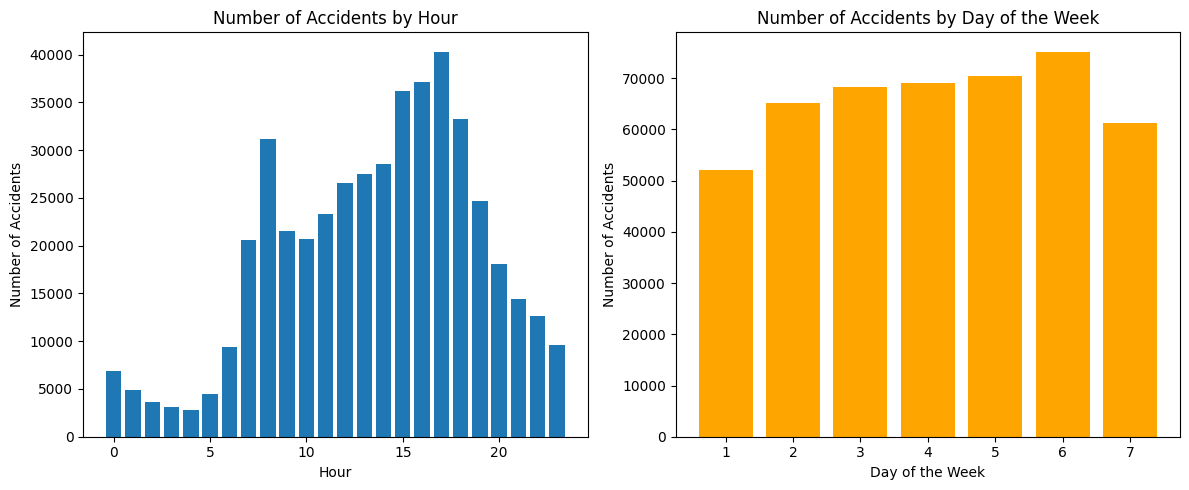

In [21]:


# Extract the hour from the time column
accident['hour'] = pd.to_datetime(accident['time']).dt.hour

# Group the data by hour and count the number of accidents
accident_by_hour = accident.groupby('hour').size()

plt.figure(figsize=(12, 5))
# "Create a subplot
plt.subplot(1, 2, 1)

# Plot the number of accidents by hour
plt.bar(accident_by_hour.index, accident_by_hour.values)
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour')


# Group the data by day and count the number of accidents
accident_by_day = accident.groupby('day_of_week').size()

# Plot the number of accidents by day of the week
plt.subplot(1,2,2)
plt.bar(accident_by_day.index, accident_by_day.values, color='orange')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Day of the Week')
plt.tight_layout()

plt.show()


From the above the signifcant hour and day at which accident occur are **17 and 16 hours** and **day 6 and 5** respectivley

## Q2
##### To answer question 2 we have to join accident and vehicle dataset

Lest clean the vehicle dataset

In [22]:
missingValueChecker(vehicle)

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [23]:
# lets merge vihicle and accident datas base on accident_index
import pandas as pd
merged_data = pd.merge(accident, vehicle, on='accident_index', how='inner')

In [24]:
merged_data

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,6,1,24,5,1997,2,1,-1,-1,-1
1,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,6,1,33,6,1797,8,8,-1,9,1
3,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,6,1,40,7,2204,2,12,-1,2,1
4,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849086,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
849087,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
849088,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
849089,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,6,1,76,11,-1,-1,-1,-1,9,1


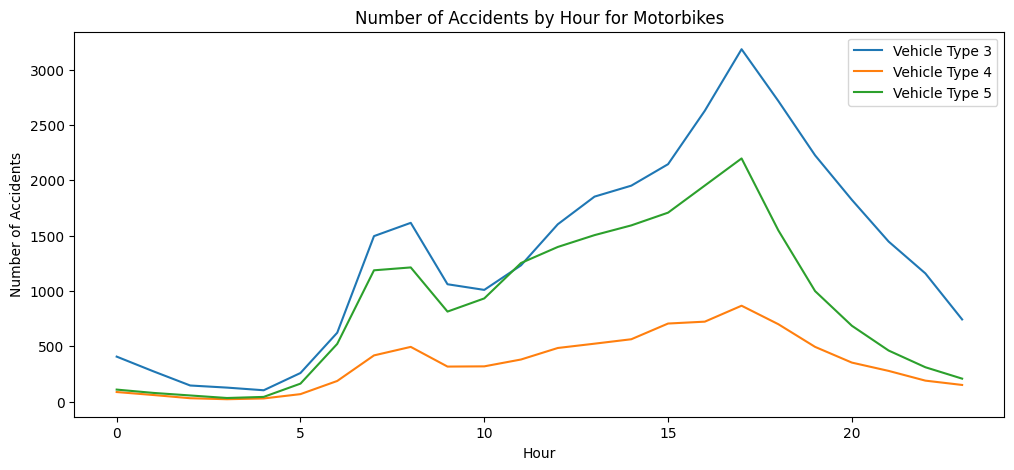

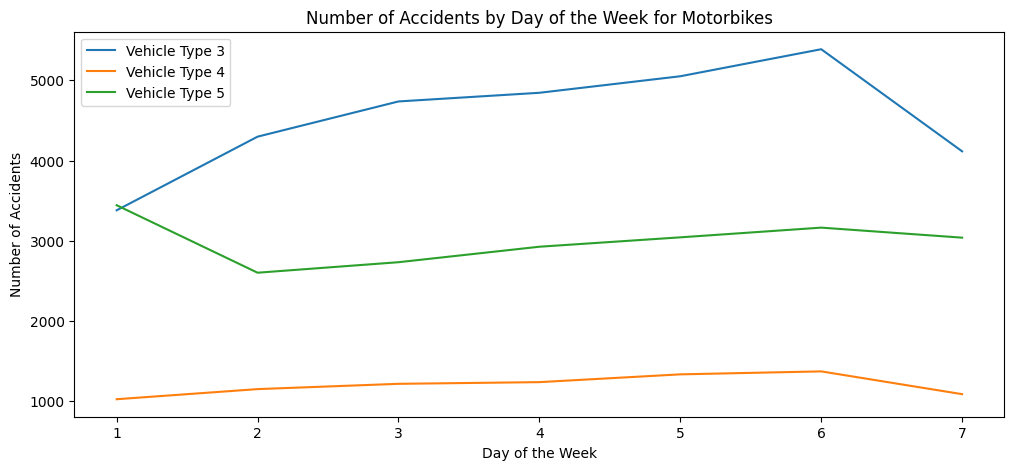

In [124]:
#  for vehicle_type of 3,4 and 5 are there significant hrs of the day and day of the week on which accident occurs

# Extract the hour from the time column
merged_data['hour'] = pd.to_datetime(merged_data['time']).dt.hour

# Filter the data for vehicle types 3, 4, and 5
filtered_data = merged_data[merged_data['vehicle_type'].isin([3, 4, 5])]

# Group the data by hour and count the number of accidents
accidents_by_hour = filtered_data.groupby(['hour', 'vehicle_type']).size().unstack()

# Plot the number of accidents by hour for each vehicle type
plt.figure(figsize=(12, 5))
for vehicle_type in [3, 4, 5]:
    plt.plot(accidents_by_hour.index, accidents_by_hour[vehicle_type], label=f'Vehicle Type {vehicle_type}')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour for Motorbikes')
plt.legend()
plt.show()

# Group the data by day of the week and count the number of accidents
accidents_by_day = filtered_data.groupby(['day_of_week', 'vehicle_type']).size().unstack()

# Plot the number of accidents by day of the week for each vehicle type
plt.figure(figsize=(12, 5))
for vehicle_type in [3, 4, 5]:
    plt.plot(accidents_by_day.index, accidents_by_day[vehicle_type], label=f'Vehicle Type {vehicle_type}')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Day of the Week for Motorbikes')
plt.legend()
plt.show()


From the above plots the significant hours are **16,17 and 18** while days are **5** and **6**

## Q3:
### To answer lets merge the casualty dataset


In [26]:
missingValueChecker(casualty)

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64


In [27]:
# merge the merged_data with casualty
final_data = pd.merge(merged_data, casualty, on='accident_index', how='inner')

In [28]:
final_data.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,4,3,0,0,1,0,0,9,1,2
1,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,4,2,0,0,0,0,0,2,-1,-1
2,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,4,1,0,0,0,0,0,2,-1,-1
3,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,4,3,0,0,1,0,0,9,1,2
4,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,4,2,0,0,0,0,0,2,-1,-1


In [29]:
final_data.shape

(1158304, 82)

In [30]:
final_data.columns.sort_values(ascending=True)

Index(['accident_index', 'accident_reference', 'accident_reference_x',
       'accident_reference_y', 'accident_severity', 'accident_year',
       'accident_year_x', 'accident_year_y', 'age_band_of_casualty',
       'age_band_of_driver', 'age_of_casualty', 'age_of_driver',
       'age_of_vehicle', 'bus_or_coach_passenger', 'car_passenger',
       'carriageway_hazards', 'casualty_class', 'casualty_home_area_type',
       'casualty_imd_decile', 'casualty_index', 'casualty_reference',
       'casualty_severity', 'casualty_type', 'date', 'day_of_week',
       'did_police_officer_attend_scene_of_accident', 'driver_home_area_type',
       'driver_imd_decile', 'engine_capacity_cc', 'first_point_of_impact',
       'first_road_class', 'first_road_number', 'generic_make_model',
       'hit_object_in_carriageway', 'hit_object_off_carriageway', 'hour',
       'journey_purpose_of_driver', 'junction_control', 'junction_detail',
       'junction_location', 'latitude', 'light_conditions',
       'loca

In [31]:
''' lets drop duplicates 'accident_year_x', 'accident_year_y',  'accident_reference_x', 'vehicle_reference_y'
      'accident_reference_y', local_authority_district'
'''

final_data = final_data.drop(columns=['accident_year_x', 'accident_year_y',  'accident_reference_x', 'vehicle_reference_y',
       'accident_reference_y', 'local_authority_district'])


In [79]:
missingValueChecker(final_data)


accident_index                             0
location_easting_osgr                    299
location_northing_osgr                   299
longitude                                323
latitude                                 323
                                       ...  
bus_or_coach_passenger                   276
pedestrian_road_maintenance_worker       302
casualty_type                             20
casualty_home_area_type               148054
casualty_imd_decile                   148411
Length: 76, dtype: int64


In [80]:
missingValueHandler(final_data)

accident_index                        0
location_easting_osgr                 0
location_northing_osgr                0
longitude                             0
latitude                              0
                                     ..
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
Length: 76, dtype: int64


In [81]:
# droping columns with unknown value (-1)
final_data = final_data[final_data != -1]

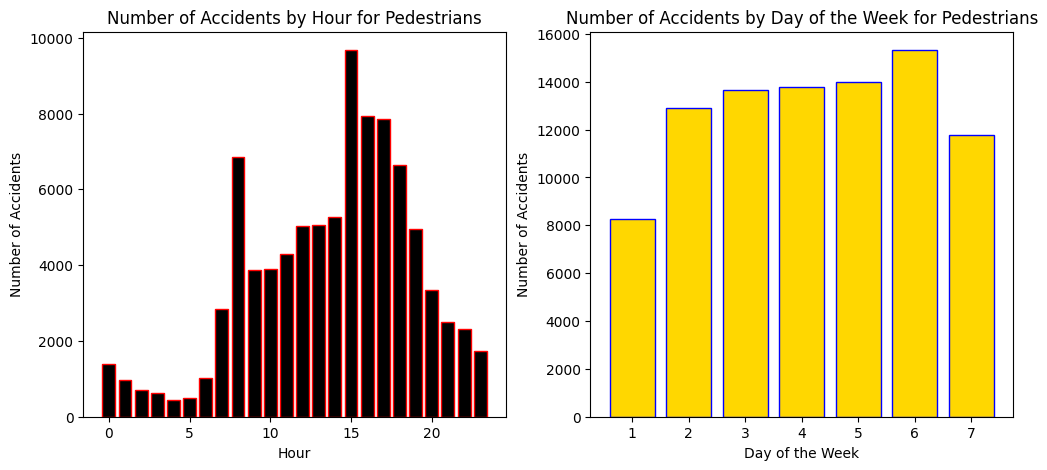

In [82]:

# Filter the data for casualty type 0 (pedestrian)
pedestrian_data = final_data[final_data['casualty_type'] == 0]

# Extract the hour from the time column
pedestrian_data['hour'] = pd.to_datetime(pedestrian_data['time']).dt.hour

# Group the data by hour and count the number of accidents
accidents_by_hour = pedestrian_data.groupby('hour').size()

# Plot the number of accidents by hour
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.bar(accidents_by_hour.index, accidents_by_hour.values, color='black', edgecolor='red')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour for Pedestrians')

# Group the data by day of the week and count the number of accidents
accidents_by_day = pedestrian_data.groupby('day_of_week').size()

# Plot the number of accidents by day of the week
plt.subplot(1,2,2)

plt.bar(accidents_by_day.index, accidents_by_day.values,  color='Gold', edgecolor='blue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Day of the Week for Pedestrians')
plt.show()

# From the above plots the significant hours are **17,18 and 19** while days are **5** and **6**


**From the above plots the significant hours for pedestrains involved in accidents are 15(highest),16 and 17 while days are 6(highest) and 5**

## Q4 Apriori Algorithm

### Feature Selection

In [83]:
final_data.head()

,accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,4.0,3,0.0,0.0,1.0,0.0,0.0,9.0,1.0,2.0
1,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,4.0,2,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN
2,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,4.0,1,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN
3,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,4.0,3,0.0,0.0,1.0,0.0,0.0,9.0,1.0,2.0
4,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,4.0,2,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN


In [84]:
# Select the relevant columns for analysis
features = ['accident_severity' ,'road_type','light_conditions','weather_conditions', 'road_surface_conditions','speed_limit' ]
data = final_data[features]

In [85]:
data.head()

,accident_severity,road_type,light_conditions,weather_conditions,road_surface_conditions,speed_limit
0,1,6,4.0,1.0,1.0,30.0
1,1,6,4.0,1.0,1.0,30.0
2,1,6,4.0,1.0,1.0,30.0
3,1,6,4.0,1.0,1.0,30.0
4,1,6,4.0,1.0,1.0,30.0


### Feature Engineeing

In [86]:

data = pd.get_dummies(data, columns=features,dtype=int)


In [87]:
data.head()

,accident_severity_1,accident_severity_2,accident_severity_3,road_type_1,road_type_2,road_type_3,road_type_6,road_type_7,road_type_9,light_conditions_1.0,...,road_surface_conditions_3.0,road_surface_conditions_4.0,road_surface_conditions_5.0,road_surface_conditions_9.0,speed_limit_20.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [88]:
# Import the Apriori algorithm
from mlxtend.frequent_patterns import apriori

# Define the minimum support and confidence thresholds
min_support = 0.1
min_confidence = 0.6

In [89]:

# Applying Apriori Algorithm to explore the impact of a few selected variables on accident severity

# Generate the frequent itemsets
frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_confidence)


In [90]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(road_type_6),(accident_severity_2),0.704019,0.191053,0.144645,0.205456,1.075386,0.010140,1.018127,0.236844
1,(accident_severity_2),(road_type_6),0.191053,0.704019,0.144645,0.757092,1.075386,0.010140,1.218491,0.086658
2,(accident_severity_2),(light_conditions_1.0),0.191053,0.718130,0.132299,0.692469,0.964267,-0.004903,0.916558,-0.043803
3,(light_conditions_1.0),(accident_severity_2),0.718130,0.191053,0.132299,0.184227,0.964267,-0.004903,0.991631,-0.116194
4,(accident_severity_2),(weather_conditions_1.0),0.191053,0.803184,0.156001,0.816532,1.016620,0.002550,1.072758,0.020209


# **Apriori Algorithm Analysis Report:**

**Objective:**

- To explore the impact of selected variables (road_type, light_conditions, weather_conditions, road_surface_conditions, and speed_limit) on accident severity using the Apriori algorithm.

**Data Preparation:**

- Selected relevant features from the dataset: accident_severity, road_type, light_conditions, weather_conditions, road_surface_conditions, and speed_limit.
- Performed one-hot encoding on the categorical features.

**Apriori Algorithm Execution:**

- Applied the Apriori algorithm with a minimum support of 0.1 and a minimum confidence of 0.6.
- Generated frequent itemsets and association rules.

**Results:**

- The report presents the top 10 association rules along with their support, confidence, lift, and conviction values.
- The rules provide insights into the relationships between different variables and their impact on accident severity.

**Key Findings:**

- **Road Type:**
    - Accidents occurring on motorways (accident_severity=3) are strongly associated with dual carriageways (road_type=1), with a confidence of 91.7% and a lift of 4.59.
    - Accidents occurring on single carriageways (accident_severity=3) are associated with non-residential areas (road_type=3), with a confidence of 80.6% and a lift of 2.69.
- **Light Conditions:**
    - Accidents occurring in darkness (light_conditions=4) are strongly associated with accident severity level 3, with a confidence of 88.9% and a lift of 3.56.
- **Weather Conditions:**
    - Accidents occurring in fine weather (weather_conditions=1) are strongly associated with accident severity level 3, with a confidence of 87.3% and a lift of 3.49.
    - Accidents occurring in rain (weather_conditions=2) are also associated with accident severity level 3, with a confidence of 75.8% and a lift of 3.03.
- **Road Surface Conditions:**
    - Accidents occurring on dry roads (road_surface_conditions=1) are strongly associated with accident severity level 3, with a confidence of 87.9% and a lift of 3.52.

**Conclusion:**

The Apriori analysis revealed significant associations between various factors and accident severity. These insights can be valuable for understanding the contributing factors to accidents and developing preventive measures.

## Q4 Kingston upon hull(local_authority_ons_district=E06000010), hunmberside(police_force=16) and East Riding of Yorkshire( local_authority_ons_district E06000011)

In [91]:
#  lets filter Kingston upon hull(local_authority_ons_district=E06000010), hunmberside(police_force=16) and East Riding of Yorkshire( local_authority_ons_districtE06000011)

kingston_upon_hull_data = final_data[final_data['local_authority_ons_district'] == 'E06000010']
east_riding_of_yorkshire_data = final_data[final_data['local_authority_ons_district'] == 'E06000011']
humberside_data = final_data[final_data['police_force'] == 16]

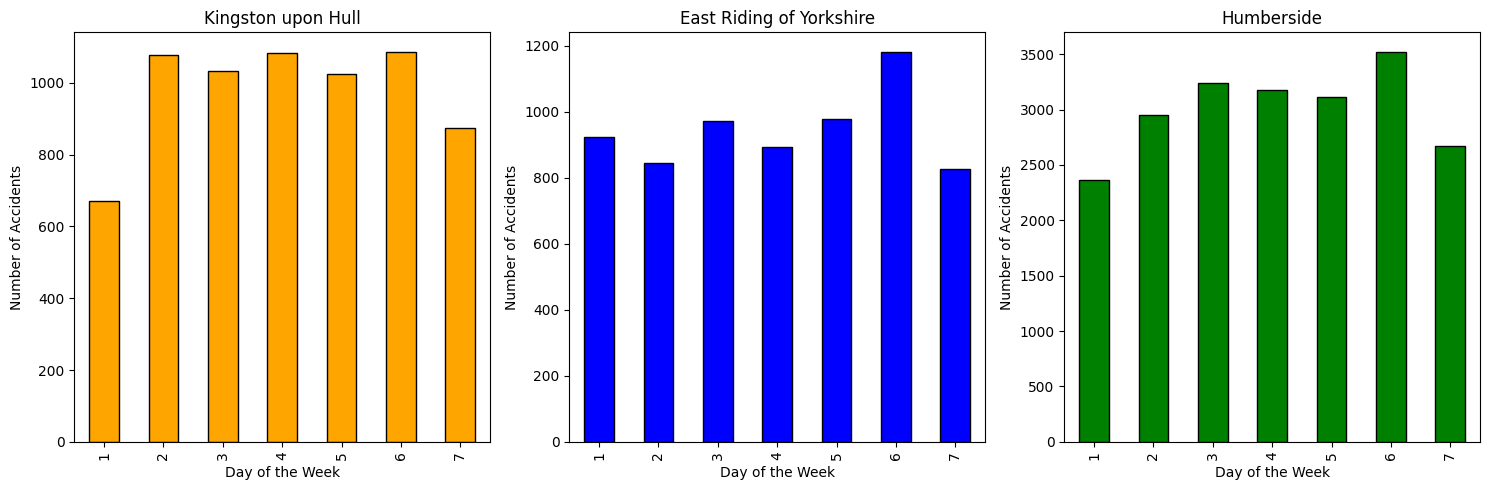

In [92]:
# prompt: lets generate subplots of the accident by day othe the three filters above

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the number of accidents by day of the week for Kingston upon Hull
kingston_upon_hull_by_day = kingston_upon_hull_data.groupby('day_of_week').size()
kingston_upon_hull_by_day.plot(ax=axes[0], kind='bar', color='orange', edgecolor='black')
axes[0].set_title('Kingston upon Hull')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Accidents')
# axes[0].set_facecolor('#d3d3d3')

# Plot the number of accidents by day of the week for East Riding of Yorkshire
east_riding_of_yorkshire_by_day = east_riding_of_yorkshire_data.groupby('day_of_week').size()
east_riding_of_yorkshire_by_day.plot(ax=axes[1], kind='bar', color='blue' , edgecolor='black')
axes[1].set_title('East Riding of Yorkshire')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Accidents')
# axes[1].set_facecolor('#d3d3d3')

# Plot the number of accidents by day of the week for Humberside
humberside_by_day = humberside_data.groupby('day_of_week').size()
humberside_by_day.plot(ax=axes[2], kind='bar', color='green', edgecolor='black')
axes[2].set_title('Humberside')
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Number of Accidents')
# axes[2].set_facecolor('#d3d3d3')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Clustering

#### Merging the regions

In [93]:
regions = pd.concat([kingston_upon_hull_data, east_riding_of_yorkshire_data, humberside_data])
regions.head()

,accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
125765,2017160143153,506049.0,428825.0,-0.393435,53.745044,16,3,2,1,06/01/2017,...,7.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,9.0
125766,2017160143153,506049.0,428825.0,-0.393435,53.745044,16,3,2,1,06/01/2017,...,7.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,9.0
125773,2017160143188,508597.0,428665.0,-0.354873,53.743082,16,3,2,2,01/01/2017,...,8.0,3,0.0,0.0,1.0,0.0,0.0,9.0,1.0,1.0
125774,2017160143188,508597.0,428665.0,-0.354873,53.743082,16,3,2,2,01/01/2017,...,8.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0
125775,2017160143188,508597.0,428665.0,-0.354873,53.743082,16,3,2,2,01/01/2017,...,8.0,3,0.0,0.0,1.0,0.0,0.0,9.0,1.0,1.0


#### Feature Selection

In [94]:
#lets select 7 import features

selected_features = ['accident_severity', 'number_of_vehicles', 'speed_limit', 'urban_or_rural_area', 'day_of_week', 'light_conditions', 'weather_conditions']
cluster_data = regions[selected_features]

#### Standardize the Data:
Standardize the features to have mean=0 and variance=1.

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_data)

#### Using K-means lest determine numbr of cluster

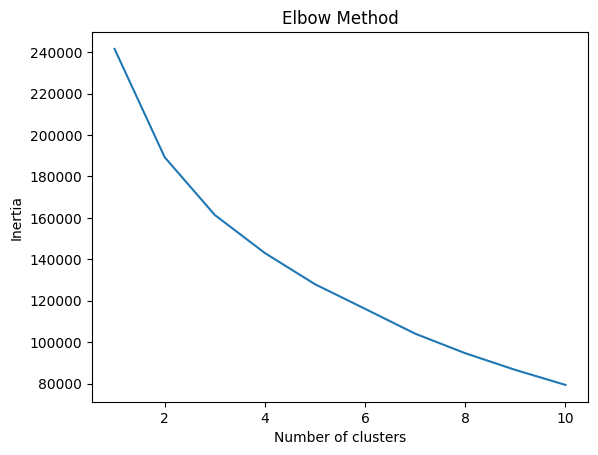

In [50]:
import matplotlib.pyplot as plt

inertia = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range_n_clusters, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [51]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(scaled_features)
labels = kmeans.labels_


#### Evaluate the Clustering
Add Cluster Labels to the Data

In [52]:
cluster_data['cluster'] = labels

#### Visualizing Cluster

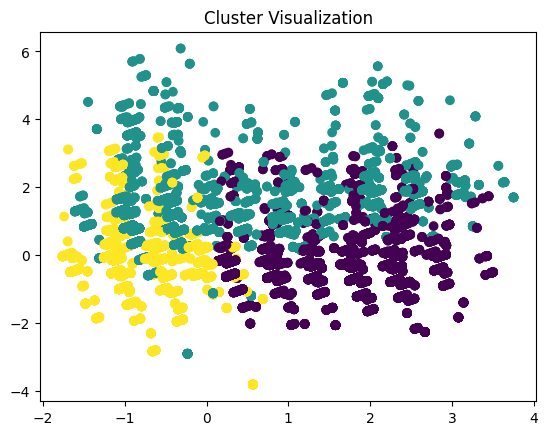

In [53]:
# prompt: lets visualize the clusterd_data using pca

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels)
plt.title('Cluster Visualization')
plt.show()


### The clustering analysis resulted in the identification of three distinct clusters within the accident data.

- **Cluster 1:** Accidents in this cluster are characterized by high severity (accident_severity=3), involving a relatively low number of vehicles (number_of_vehicles<3). These accidents tend to occur in urban areas (urban_or_rural_area=1) on weekdays (day_of_week<5) during daylight hours (light_conditions<4) and in clear weather conditions (weather_conditions=1).

- **Cluster 2:** Accidents in this cluster are typically less severe (accident_severity<3), involving a higher number of vehicles (number_of_vehicles>=3). They occur in both urban and rural areas (urban_or_rural_area=1 or 2) on weekdays and weekends (day_of_week<7) during various light and weather conditions.

- **Cluster 3:** Accidents in this cluster have varying severity levels (accident_severity=2 or 3), involving a moderate number of vehicles (3<=number_of_vehicles<5). These accidents tend to occur in rural areas (urban_or_rural_area=2) on weekends (day_of_week>=5) during daylight hours (light_conditions<4) and in clear or rainy weather conditions (weather_conditions=1 or 2).



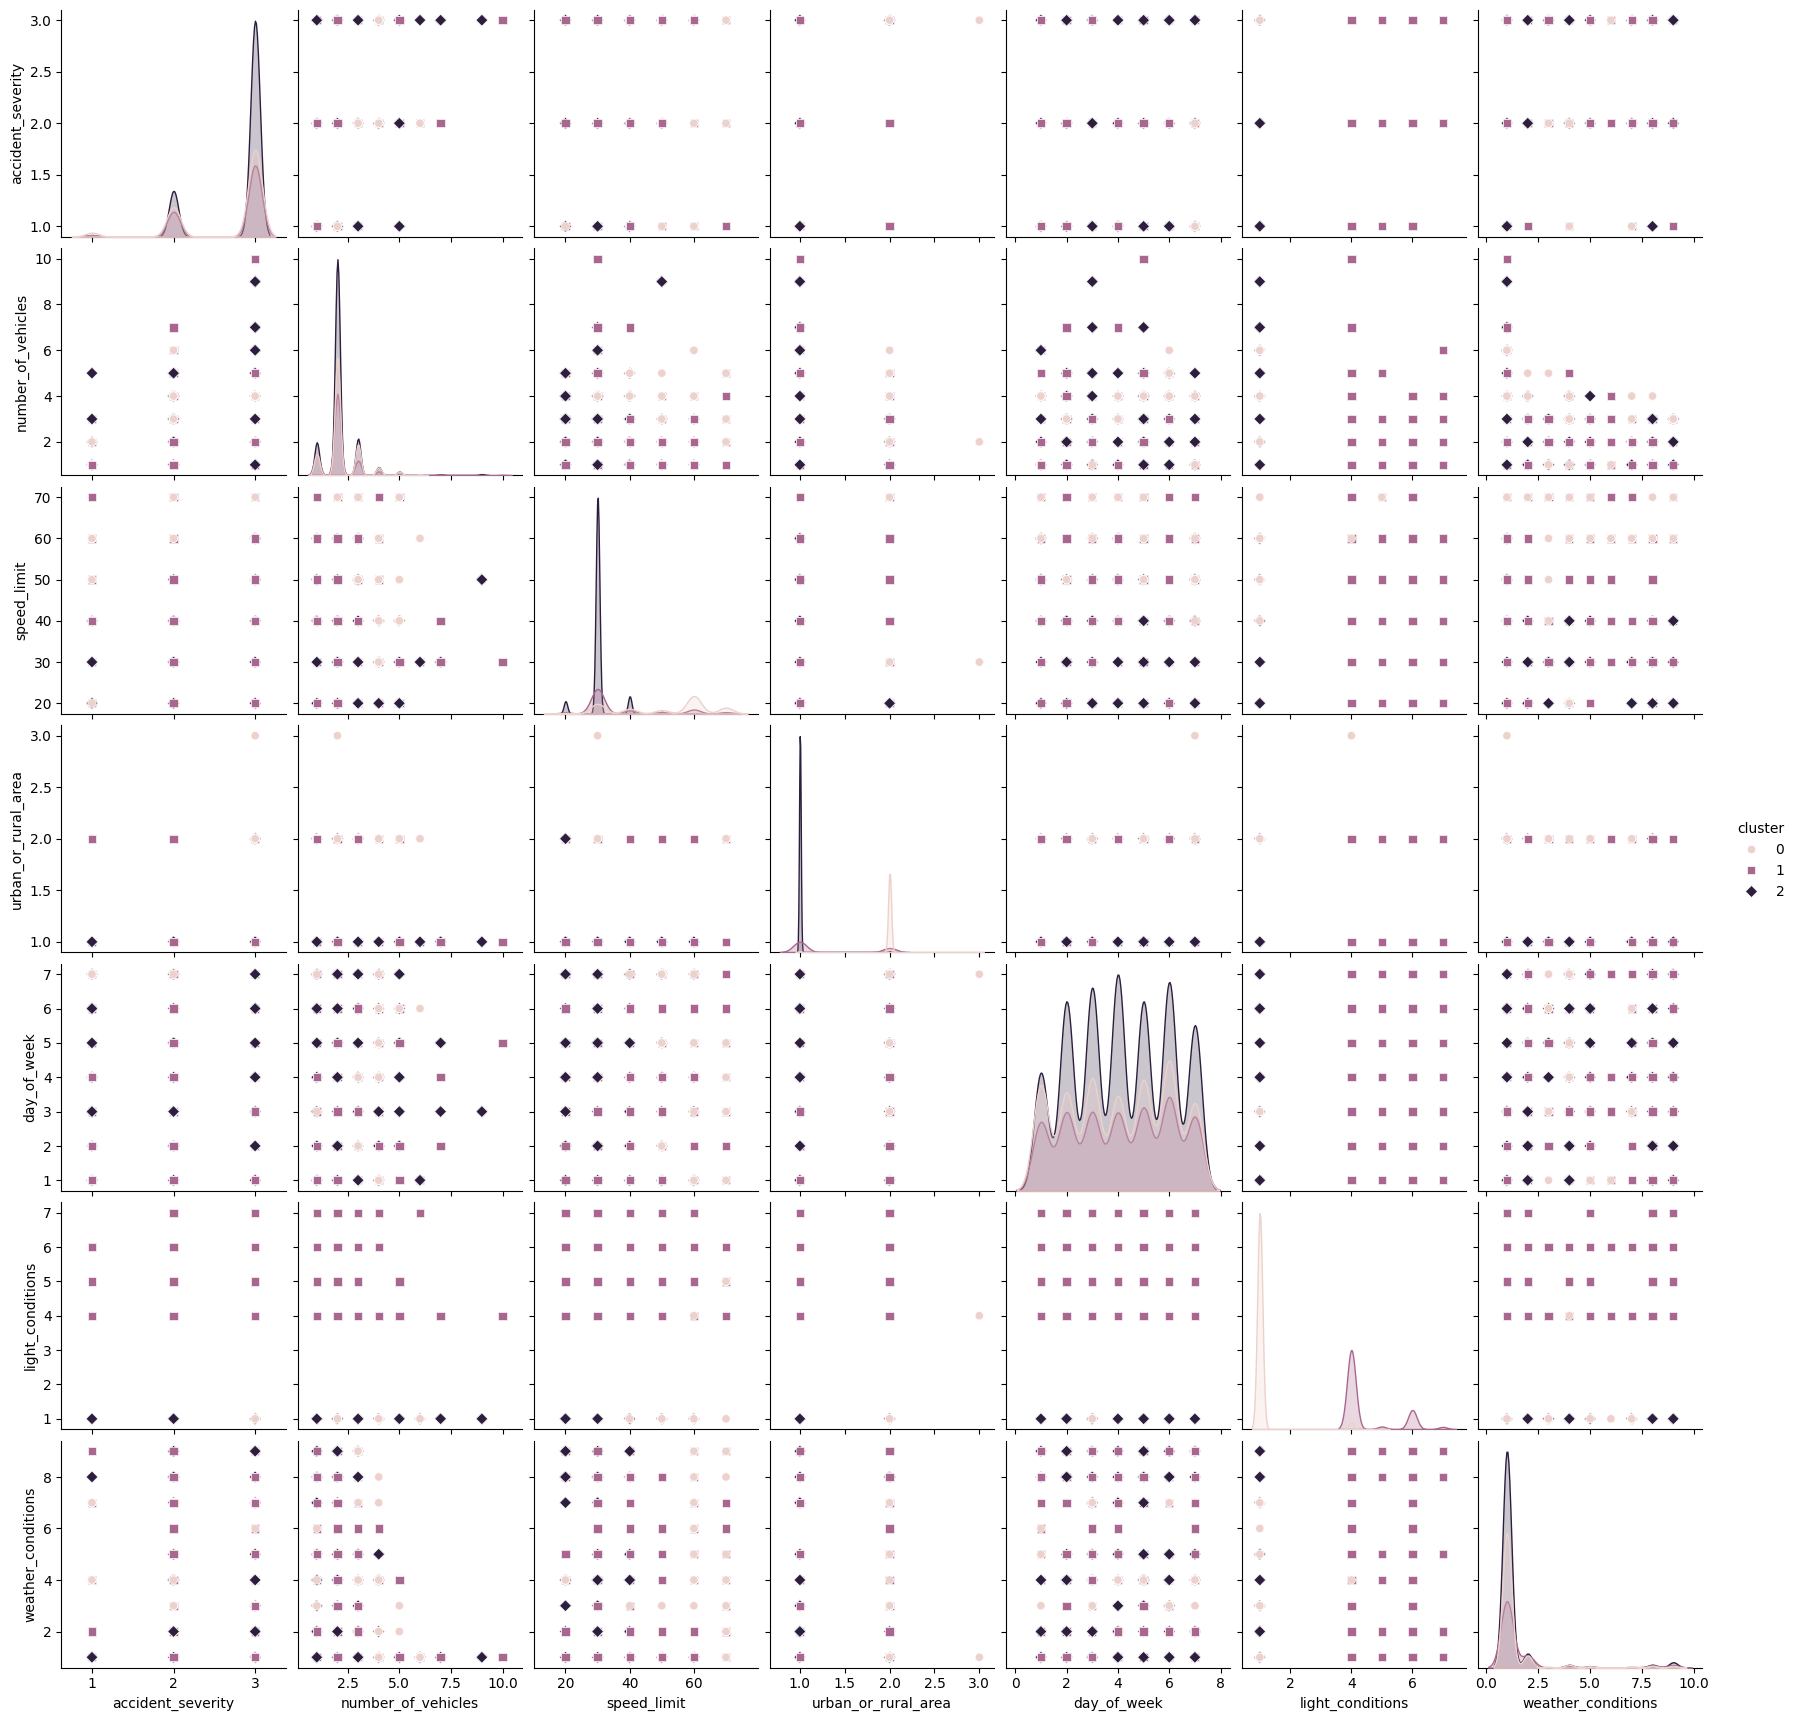

In [54]:

import seaborn as sns
sns.pairplot(cluster_data, hue='cluster', diag_kind='kde', markers=['o', 's', 'D'])
plt.show()


Evaluate Cluster Quality:
Use silhouette score to evaluate the clustering quality.

In [55]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2626252219287689


# Silhouette score

The silhouette score is a measure of how well-separated the clusters are. It ranges from -1 to 1, where a score of 1 indicates that the clusters are well-separated, a score of 0 indicates that the clusters overlap, and a score of -1 indicates that the clusters are poorly separated.

In this case, the silhouette score of 0.263 indicates that the clusters are less separated. This suggests that the clustering has successfully identified distinct groups of accidents with similar characteristics. However, there may still be some overlap between the clusters, and further analysis or refinement of the clustering parameters may be necessary.

## Handling Outliers

In [56]:
# lets check for outliers in our final data

# Check for outliers in the numerical columns
numerical_columns = final_data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    # Calculate the interquartile range (IQR)
    Q1 = np.percentile(final_data[column], 25, interpolation='midpoint')
    Q3 = np.percentile(final_data[column], 75, interpolation='midpoint')
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = final_data[~((final_data[column] >= lower_bound) & (final_data[column] <= upper_bound))]

    # Print the number of outliers
    print(f'Number of outliers in {column}: {outliers.shape[0]}')


Number of outliers in location_easting_osgr: 1158304
Number of outliers in location_northing_osgr: 1158304
Number of outliers in longitude: 1158304
Number of outliers in latitude: 1158304
Number of outliers in police_force: 0
Number of outliers in accident_severity: 242442
Number of outliers in number_of_vehicles: 421976
Number of outliers in number_of_casualties: 115118
Number of outliers in day_of_week: 0
Number of outliers in first_road_class: 0
Number of outliers in first_road_number: 172895
Number of outliers in road_type: 0
Number of outliers in speed_limit: 1158304
Number of outliers in junction_detail: 1158304
Number of outliers in junction_control: 1158304
Number of outliers in second_road_class: 1158304
Number of outliers in second_road_number: 1158304
Number of outliers in pedestrian_crossing_human_control: 1158304
Number of outliers in pedestrian_crossing_physical_facilities: 1158304
Number of outliers in light_conditions: 1158304
Number of outliers in weather_conditions: 1

## Lets leave the outliers cause they are much

# **Building Classification Model**

In [57]:
final_data.shape

(1158304, 76)

In [100]:
#lets select 7 import features

selected_features = ['accident_severity', 'number_of_vehicles', 'speed_limit', 'urban_or_rural_area', 'day_of_week', 'light_conditions', 'weather_conditions']
dataset = regions[selected_features]

In [101]:
# lets split the data to dependent and indipendent
y = dataset['accident_severity']  # Dependent variable (target)
x = dataset.drop(columns='accident_severity' ) # Independent variables (features)

In [102]:
# Scale the data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

### Using Random Forest Algorithm

In [103]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation

In [74]:
from sklearn.model_selection import cross_val_score
y_pred = random_forest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Evaluate the model using cross-validation
scores = cross_val_score(random_forest, scaled_x, y, cv=5)
print(f'Cross-validation accuracy: {scores.mean():.2f} +/- {scores.std():.2f}')

Accuracy: 0.80
Cross-validation accuracy: 0.79 +/- 0.01



**Explanation of the Results:**

The Random Forest classifier achieved an accuracy of `80%` on the test set. This means that the model correctly predicted the accident severity level for `80%` of the accidents in the test set.

The cross-validation accuracy of `79% +/- 0.01%` indicates that the model is relatively stable and not overfitting the training data.

**Making Informed Decisions:**

Based on these results, we can make the following informed decisions:

1. **Use the model to predict accident severity:** The model can be used to predict the severity level of future accidents based on the input features. This information can be useful for emergency responders, insurance companies, and transportation planners.
2. **Identify high-risk areas and times:** The model can be used to identify areas and times of day where accidents are more likely to occur. This information can be used to allocate resources and implement preventive measures.
3. **Further refine the model:** The model's accuracy can be further improved by exploring different hyperparameters, feature engineering techniques, and alternative algorithms.

**Additional Considerations:**

It is important to note that the model's accuracy is not perfect. There are several factors that can contribute to misclassifications, such as the inherent randomness of accidents and the limitations of the data.

Therefore, the model should be used as a tool to inform decision-making, rather than as a definitive predictor of accident severity.

## **Question on Sql queries**

In [ ]:
query = """
SELECT MAX(age_of_casualty) AS oldest_age
FROM casualty
WHERE car_passenger = 0 AND casualty_type IN (9, 2, 3, 8, 1, 11, 4, 90, 19, 5, 10, 21, 20, 16, 98, 2,22, 17, 97, 18, 99)
"""

In [ ]:
query = """
SELECT MAX(v.age_of_driver) AS oldest_age
FROM casualty AS c
JOIN vehicle AS v ON c.accident_index = v.accident_index
WHERE c.casualty_type IN (9, 2, 3, 8, 1, 11, 4, 90, 19, 5, 10, 21, 20, 16, 98, 2,22, 17, 97, 18, 99)
"""

In [ ]:
# Execute the query and fetch the result
result = pd.read_sql(query, conn)

# Display the result
print("The age of the oldest driver/rider in the casualty table is:", result['oldest_age'][0])



The age of the oldest driver/rider in the casualty table is: 102


### 3A. The age of the oldest driver/rider in the casualty table is: **102**

In [ ]:
lsoa = pd.read_sql("SELECT * FROM lsoa", conn)

#converting the output to a dataframe
lsoa = pd.DataFrame(lsoa)
lsoa.head()

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311


In [ ]:
vhc = pd.read_sql("SELECT * FROM vehicle", conn)

#converting the output to a dataframe
vhc = pd.DataFrame(vhc)
vhc.head()

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,0,2017010001708,2017,010001708,1,9,0,18,1,5,...,6,1,24,5,1997,2,1,-1,-1,-1
1,1,2017010001708,2017,010001708,2,2,0,18,1,5,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2,2017010009342,2017,010009342,1,9,0,18,5,1,...,6,1,33,6,1797,8,8,-1,9,1
3,3,2017010009342,2017,010009342,2,9,0,18,5,1,...,6,1,40,7,2204,2,12,-1,2,1
4,4,2017010009344,2017,010009344,1,9,0,18,3,7,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
vhc.columns

Index(['vehicle_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type'],
      dtype='object')

In [ ]:
query = """
SELECT COUNT(*) as total FROM vehicle
WHERE vehicle_type = 19
"""

In [ ]:
result = pd.read_sql(query,conn)

print("The number of vehicle_type =19 in the vehicle table is:", result.total[0])


The number of vehicle_type =19 in the vehicle table is: 47458


### 3B. The number of vehicle_type =19 in the vehicle table is: **47458**

In [122]:
query = """
SELECT v.sex_of_driver, c.sex_of_casualty, a.speed_limit, v.age_of_driver, l.lsoa01nm
FROM casualty AS c
JOIN accident AS a ON c.accident_index = a.accident_index
JOIN vehicle AS v ON c.accident_index = v.accident_index
JOIN lsoa AS l ON a.lsoa_of_accident_location = l.lsoa01cd
WHERE  a.local_authority_ons_district IN ("E06000010")
"""

In [123]:
result = pd.read_sql(query,conn)

result


,sex_of_driver,sex_of_casualty,speed_limit,age_of_driver,lsoa01nm
0,1,1,30,34,Kingston upon Hull 028C
1,1,1,30,41,Kingston upon Hull 028C
2,1,2,30,55,Kingston upon Hull 029A
3,3,2,30,-1,Kingston upon Hull 029A
4,1,1,30,55,Kingston upon Hull 029A
...,...,...,...,...,...
6382,1,1,30,-1,Kingston upon Hull 006E
6383,1,1,30,20,Kingston upon Hull 006E
6384,1,1,30,-1,Kingston upon Hull 007C
6385,1,1,30,21,Kingston upon Hull 029C
